In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the exel file and skip specific rows
original_dataset = pd.read_excel('/content/dataBiomass_CE880.xlsx', skiprows=2)
# printing five rows of the dataset
original_dataset.head()

,Number,Cellulose,Hemicellulose,Lignin,Temp,Pressure,Equivalance mass ratio,Steam to biomass mass ratio,Superficial gas velocity,H2,CO,CO2,CH4,Lower heating value,Char yield,tar yield
0,1,0.460025,0.28884,0.251135,665.0,1.0,0.25,0.0,0.22,9.696970,48.242424,35.030303,7.030303,9.646865,24.0,0.0
1,2,0.460025,0.28884,0.251135,744.0,1.0,0.30,0.0,0.22,10.125904,40.048219,43.477096,6.348781,8.416246,21.7,0.0
2,3,0.460025,0.28884,0.251135,811.0,1.0,0.35,0.0,0.22,9.614294,36.159955,48.610323,5.615428,7.608063,19.0,0.0
3,4,0.460025,0.28884,0.251135,670.0,1.0,0.25,0.0,0.28,9.686536,46.993834,37.255910,6.063720,9.141723,29.6,0.0
4,5,0.460025,0.28884,0.251135,750.0,1.0,0.30,0.0,0.28,9.368972,39.763020,45.356848,5.511160,7.998170,27.4,0.0


In [3]:
new_dataset = original_dataset.drop(original_dataset.columns[0], axis=1)
columns_to_drop = ['Cellulose', 'Hemicellulose', 'Lignin', 'Temperature', 'Pressure',
      'Equivalence ratio', 'Steam to biomass ratio', 'Superficial gas velocity',
      'H2', 'CO', 'CO2', 'CH4', 'Lower heating value', 'Char yield', 'Tar yield']
new_dataset.columns = columns_to_drop

In [4]:
print(new_dataset.columns)

Index(['Cellulose', 'Hemicellulose', 'Lignin', 'Temperature', 'Pressure',
       'Equivalence ratio', 'Steam to biomass ratio',
       'Superficial gas velocity', 'H2', 'CO', 'CO2', 'CH4',
       'Lower heating value', 'Char yield', 'Tar yield'],
      dtype='object')


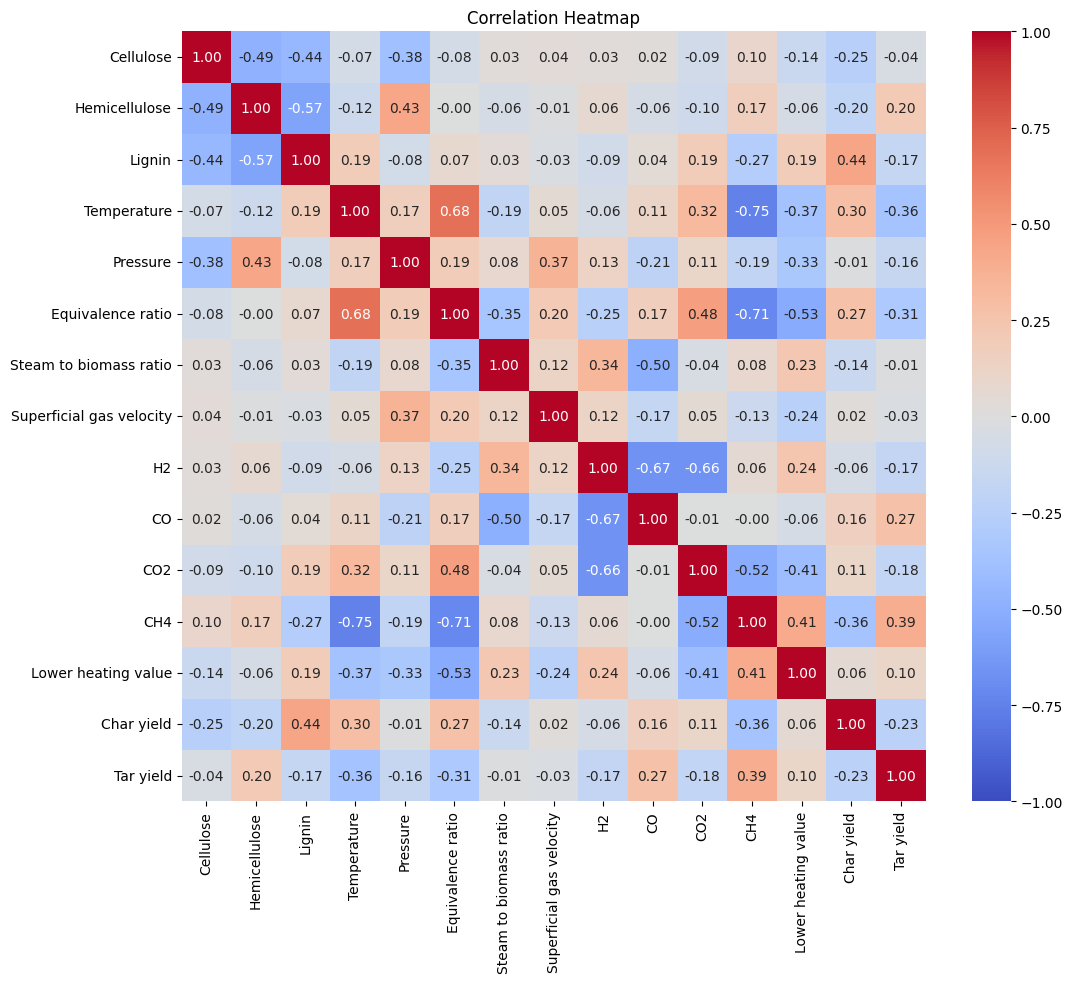

In [5]:
# Visualizing the correlation matrix
corr_matrix_subset = new_dataset.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_subset, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [6]:
# Separating features inpute(X) and multiple output variables(y)
X = new_dataset.drop(columns=['Cellulose', 'Hemicellulose', 'Lignin', 'Temperature', 'Pressure',
      'Equivalence ratio', 'Steam to biomass ratio', 'Superficial gas velocity'])
y = new_dataset[['H2', 'CO', 'CO2', 'CH4', 'Lower heating value', 'Char yield', 'Tar yield']]


In [7]:
# Splitting the multiple output variables (y)
y_train, y_test_validation = train_test_split(y, test_size=0.4, random_state=42)
y_test, y_validation = train_test_split(y_test_validation, test_size=0.5, random_state=42)
# Chicking datatypes in y_train
print(y_train.dtypes)

H2                     float64
CO                     float64
CO2                    float64
CH4                    float64
Lower heating value    float64
Char yield             float64
Tar yield              float64
dtype: object


In [8]:
# Converting object columns to numeric in y_train
y_train = y_train.apply(pd.to_numeric, errors='coerce')
# Droping any rows with NaN values that might have been created during the conversion
y_train = y_train.dropna()
# Scaleing the features
scaler = MinMaxScaler()
y_train_scaled = scaler.fit_transform(y_train)
y_train_scaled = pd.DataFrame(y_train_scaled, columns=y_train.columns)
y_val_scaled = scaler.transform(y_validation)
y_test_scaled = scaler.transform(y_test)

In [9]:

models = {
     'Support Vector Machine': SVR(),
     'Random Forest': RandomForestRegressor(),
     'K-Nearest Neighbors': KNeighborsRegressor(),
     'XGBoost': XGBRegressor(),
     'Neural Network': MLPRegressor()
}

results = []

for model_name, model_instance in models.items():
    print(f"\nTraining and evaluating {model_name} model...")

    model_results = {'Model': model_name, 'Metrics': {}}

    for output_var in y_train_scaled.columns:
        print(f"Fitting model for output variable: {output_var}")
        model_instance.fit(y_train_scaled, y_train_scaled[output_var])
        y_pred = model_instance.predict(y_val_scaled)

        mse = mean_squared_error(y_validation[output_var], y_pred)
        r2 = r2_score(y_validation[output_var], y_pred)

        model_results['Metrics'][output_var] = {'MSE': mse, 'R2': r2}
    results.append(model_results)

# Printing results for each model
for result in results:
    print(f"\nModel: {result['Model']}")
    for output_var, metric_values in result['Metrics'].items():
        print(f"Output variable: {output_var}")
        print(f"Mean Squared Error (MSE): {metric_values['MSE']}")
        print(f"R-squared (R2): {metric_values['R2']}")
        print("=" * 20)



Training and evaluating Support Vector Machine model...
Fitting model for output variable: H2
Fitting model for output variable: CO
Fitting model for output variable: CO2
Fitting model for output variable: CH4
Fitting model for output variable: Lower heating value
Fitting model for output variable: Char yield
Fitting model for output variable: Tar yield

Training and evaluating Random Forest model...
Fitting model for output variable: H2
Fitting model for output variable: CO
Fitting model for output variable: CO2
Fitting model for output variable: CH4
Fitting model for output variable: Lower heating value
Fitting model for output variable: Char yield
Fitting model for output variable: Tar yield

Training and evaluating K-Nearest Neighbors model...
Fitting model for output variable: H2
Fitting model for output variable: CO
Fitting model for output variable: CO2
Fitting model for output variable: CH4
Fitting model for output variable: Lower heating value
Fitting model for output variabl

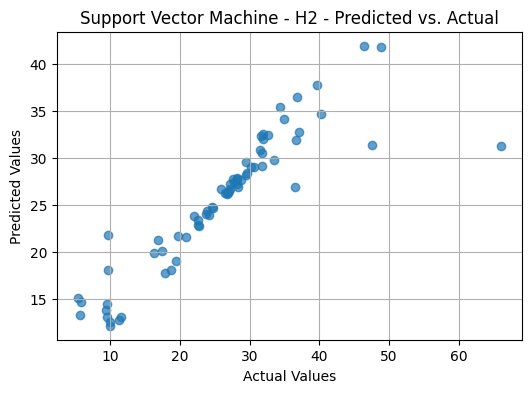

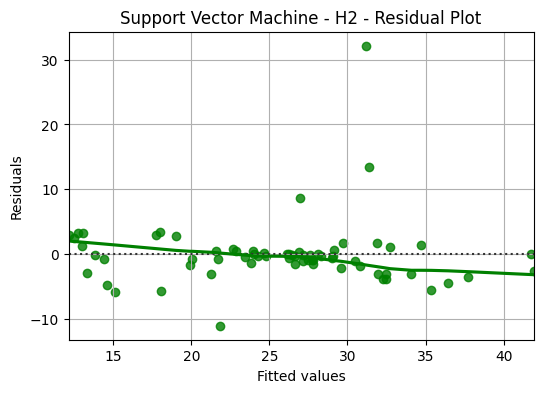

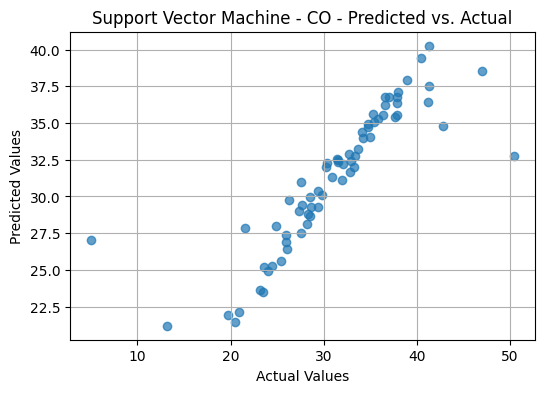

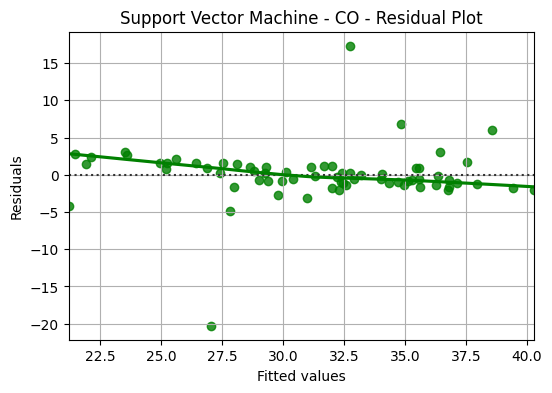

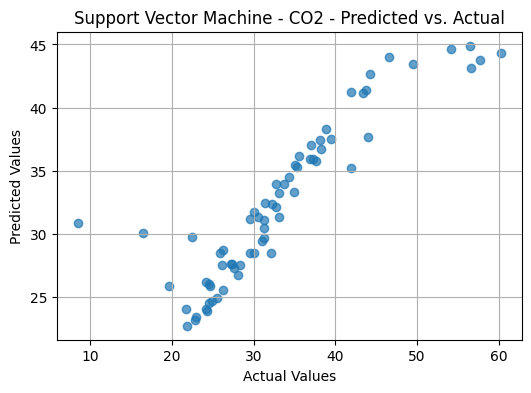

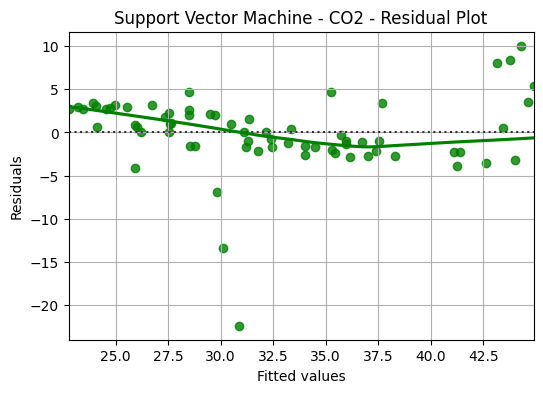

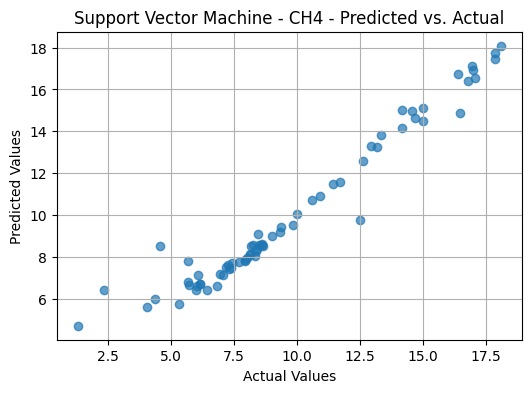

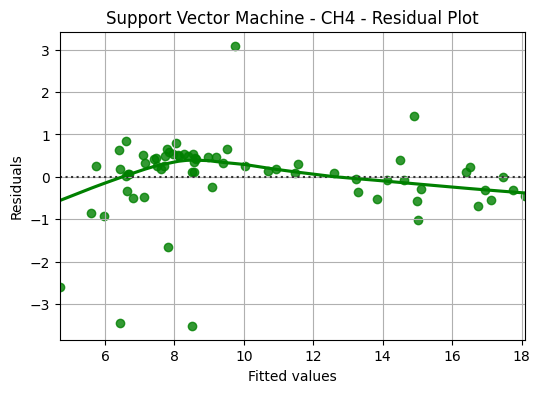

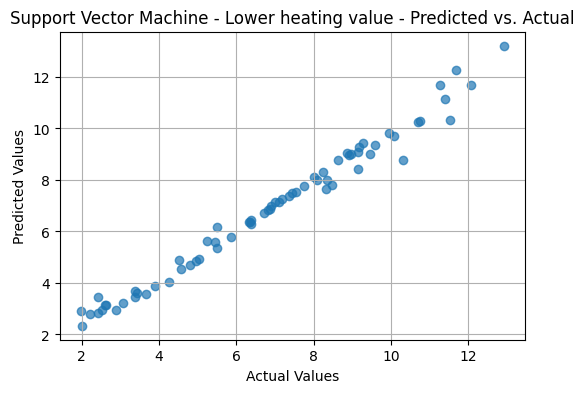

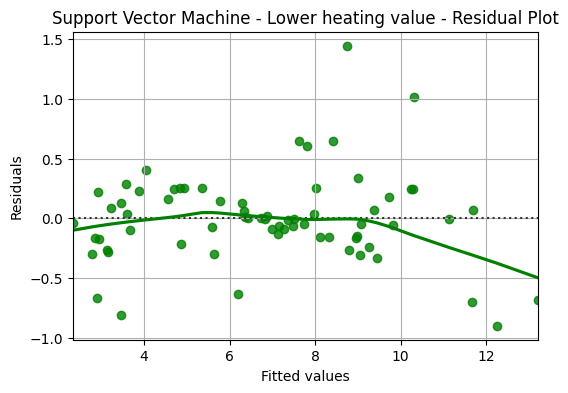

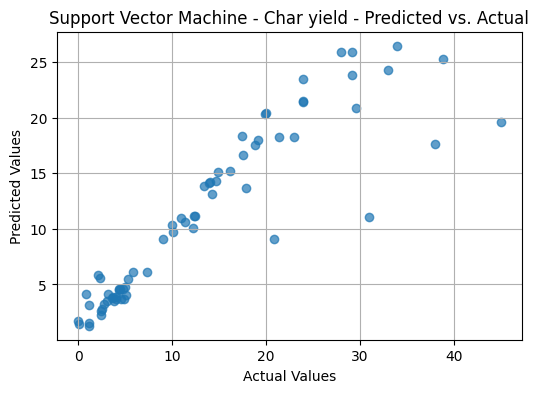

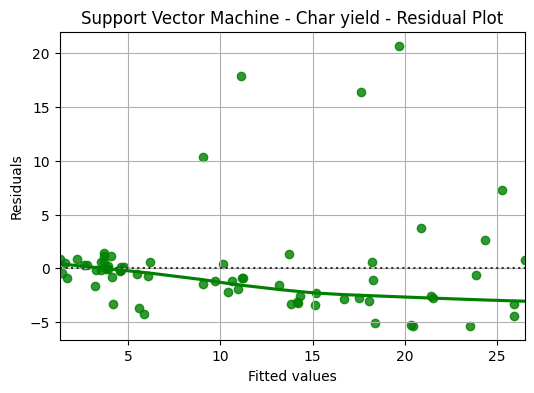

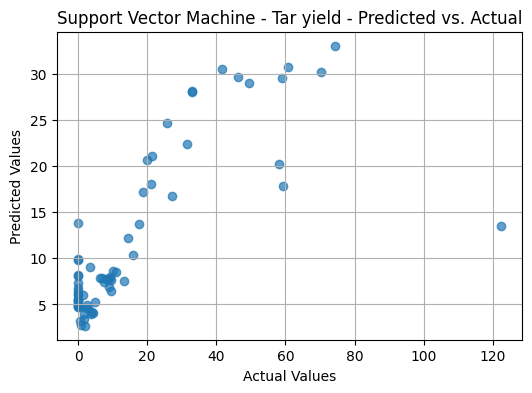

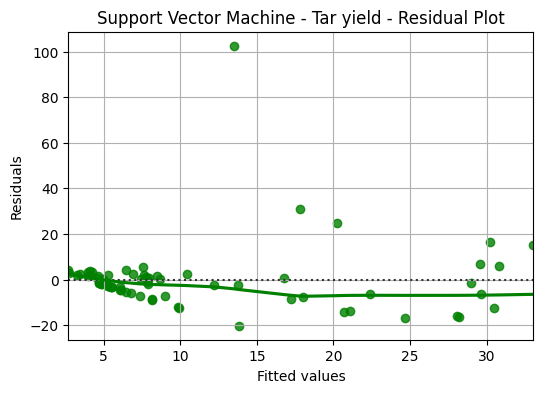

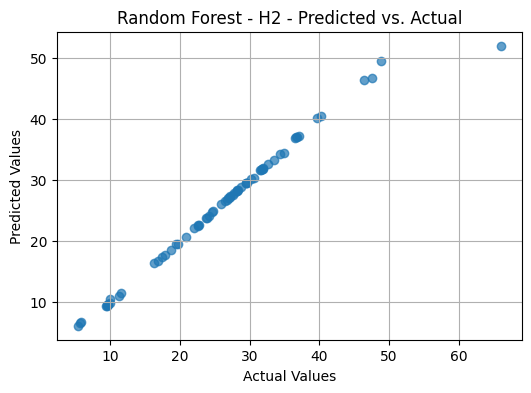

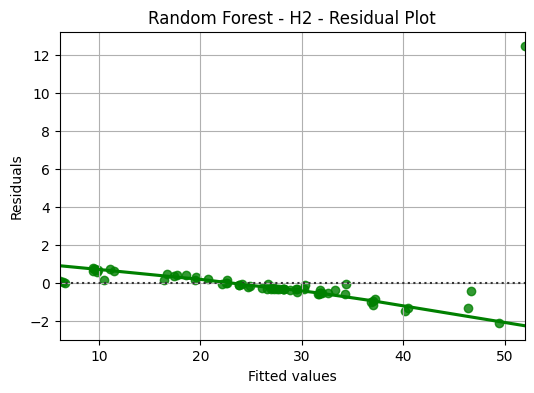

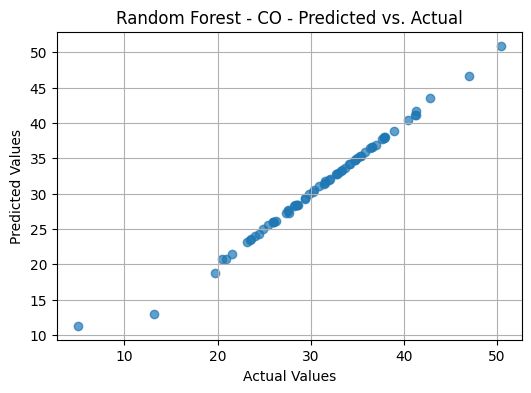

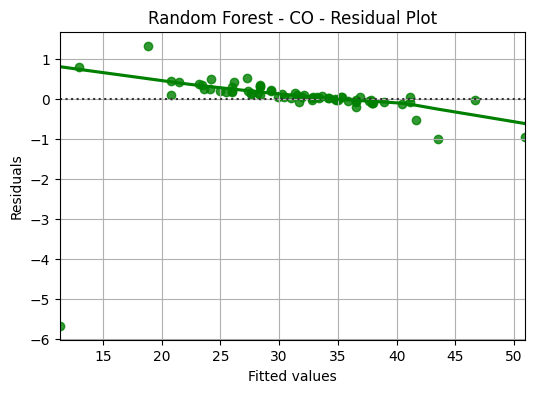

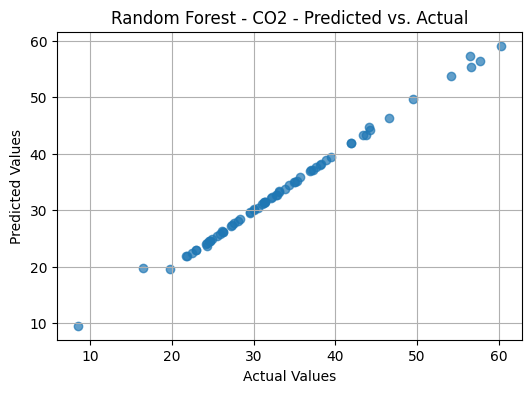

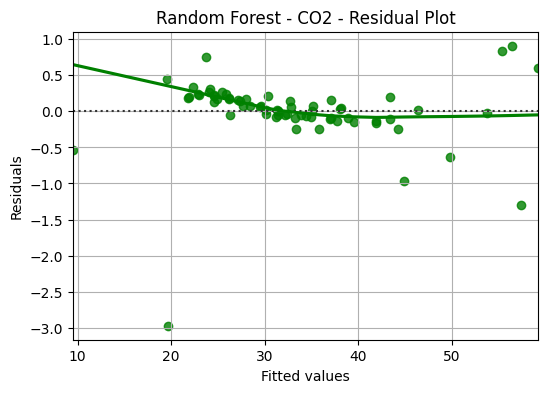

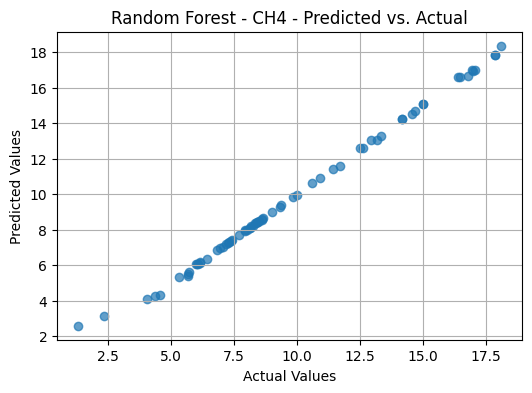

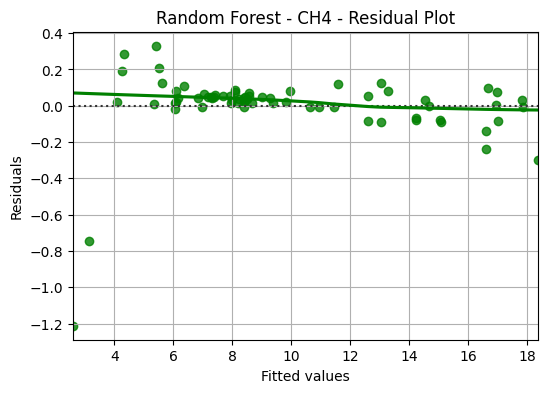

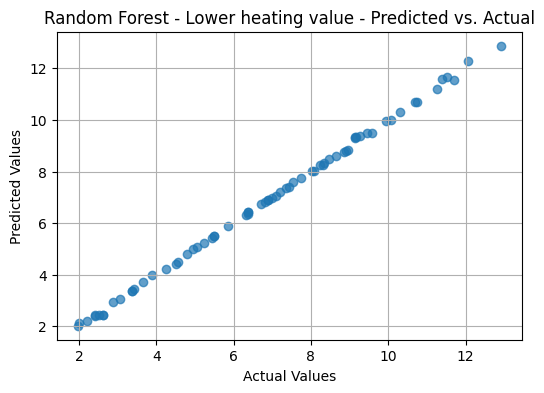

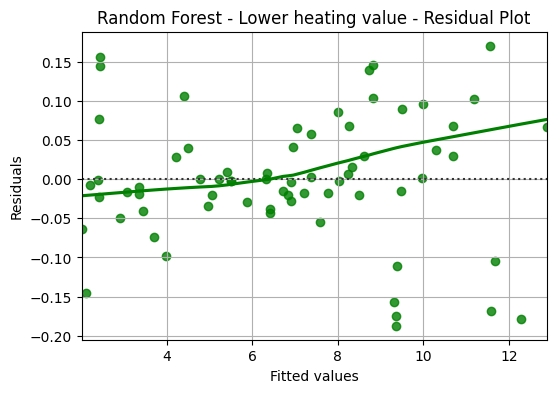

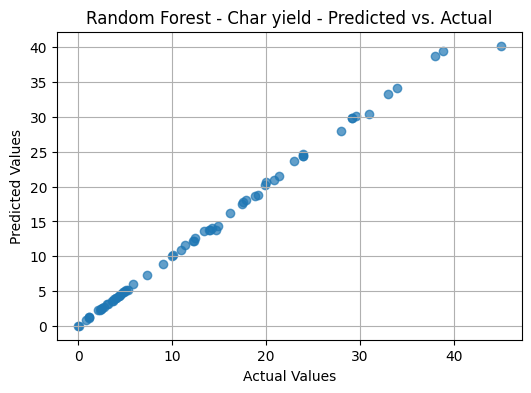

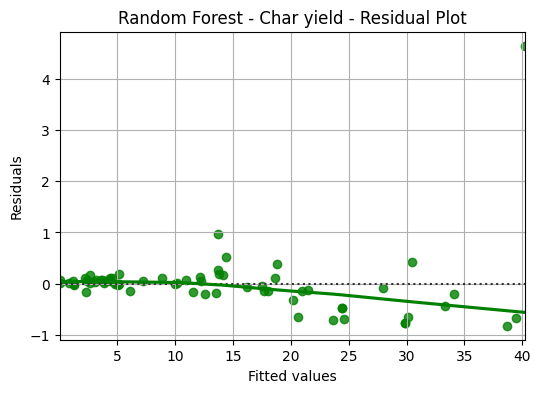

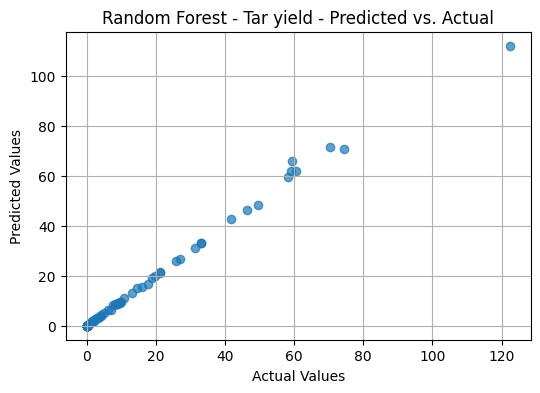

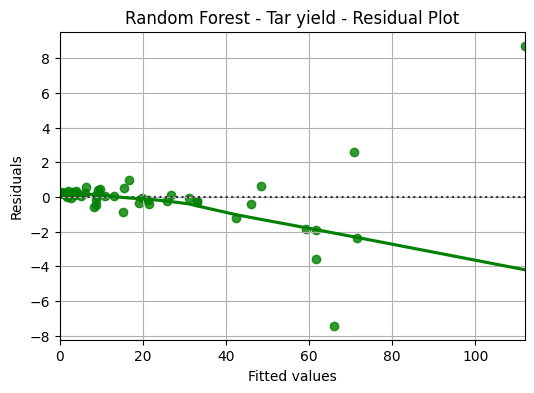

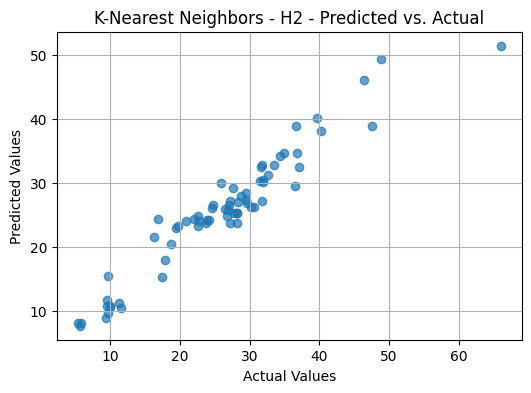

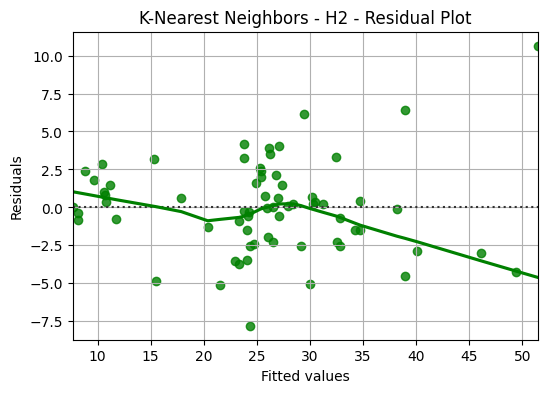

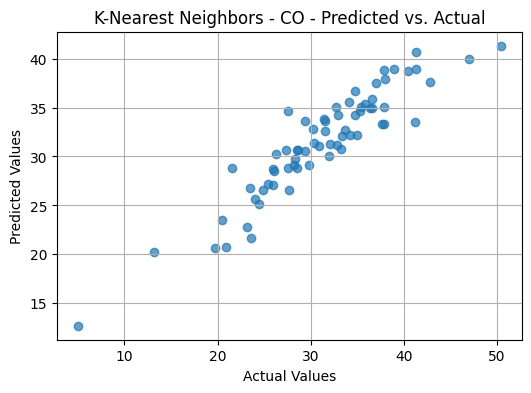

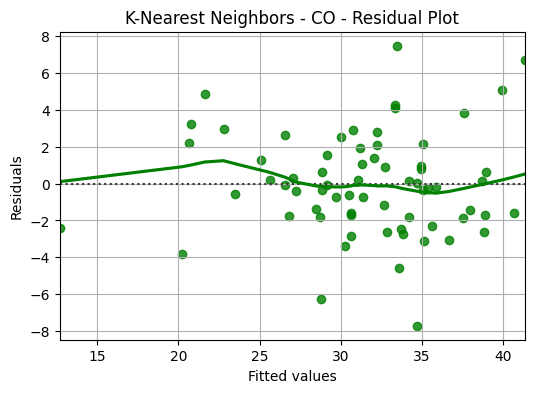

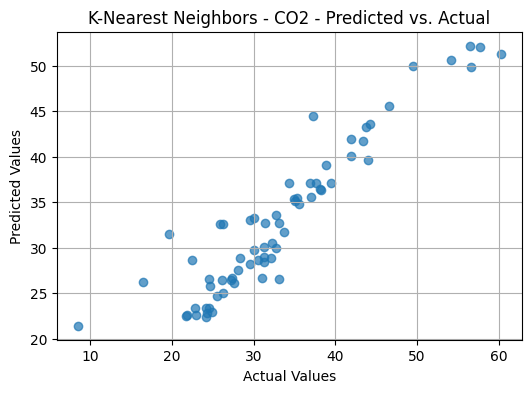

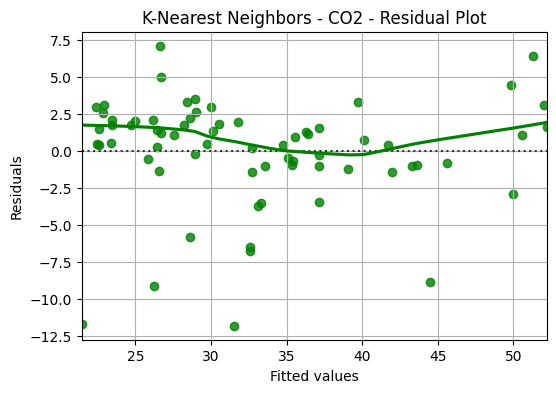

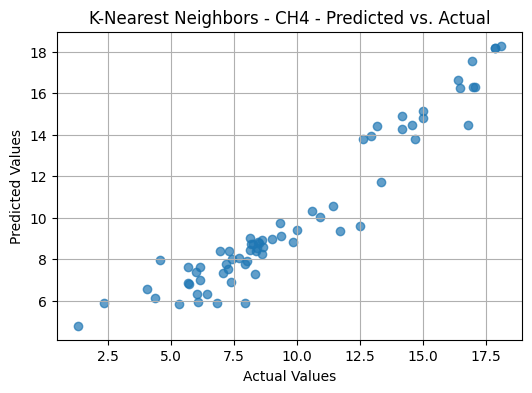

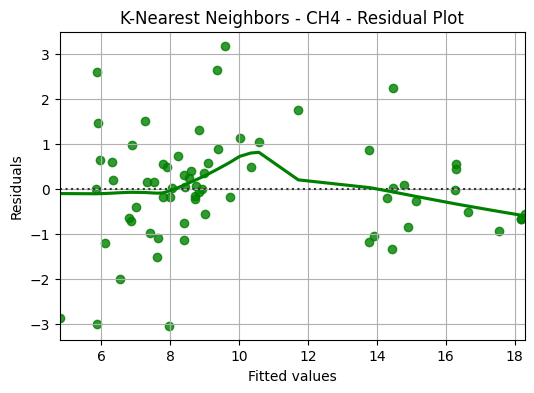

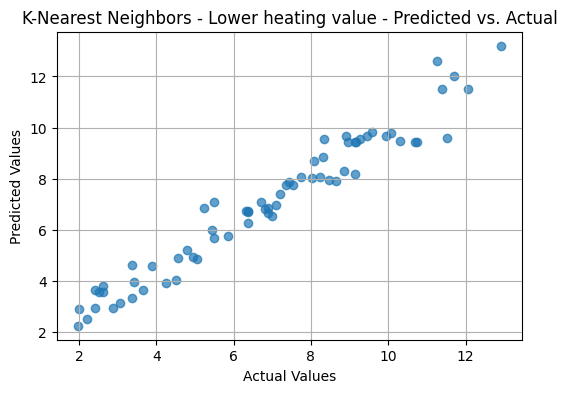

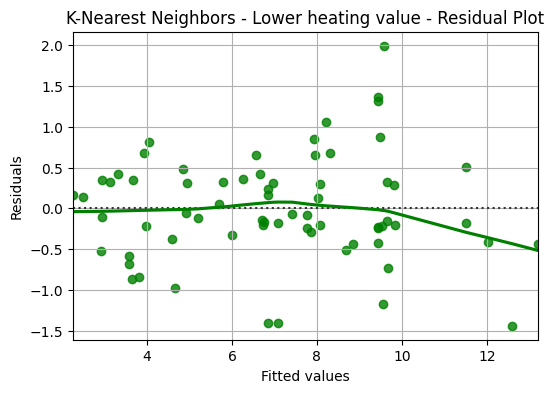

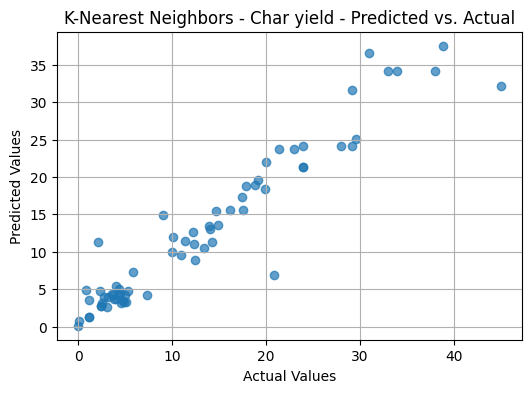

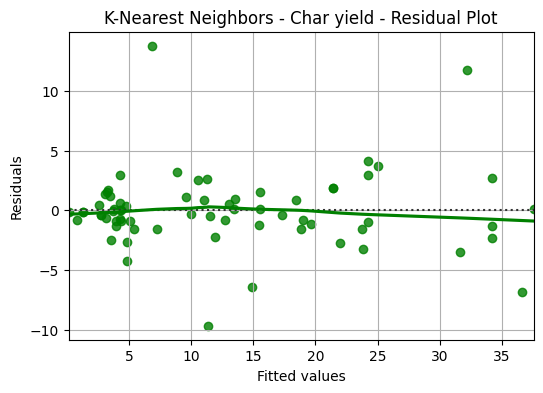

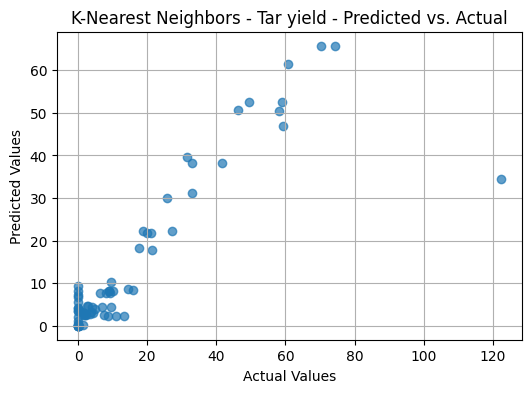

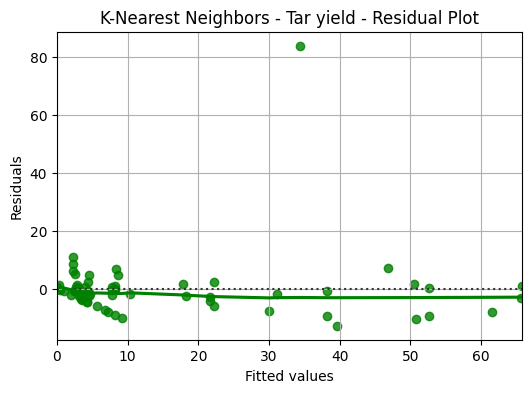

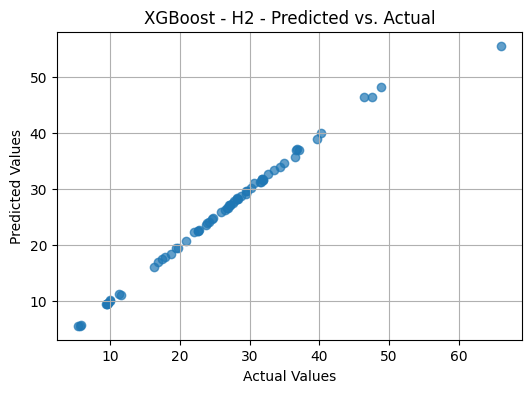

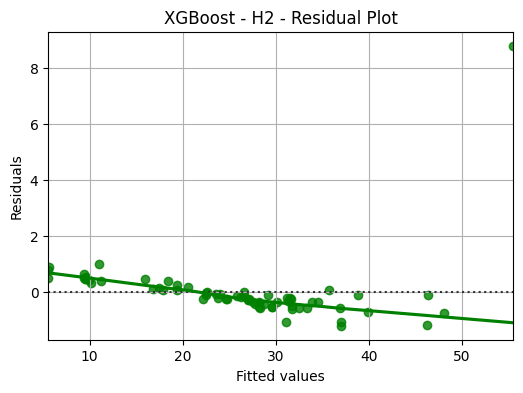

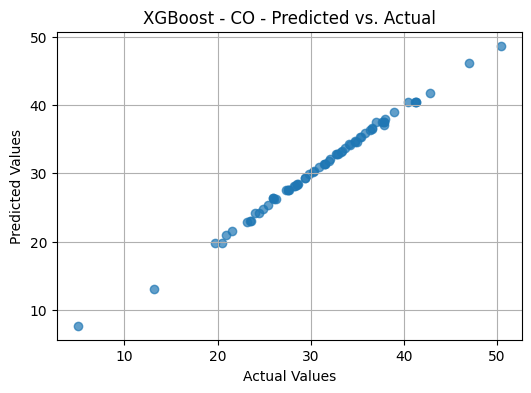

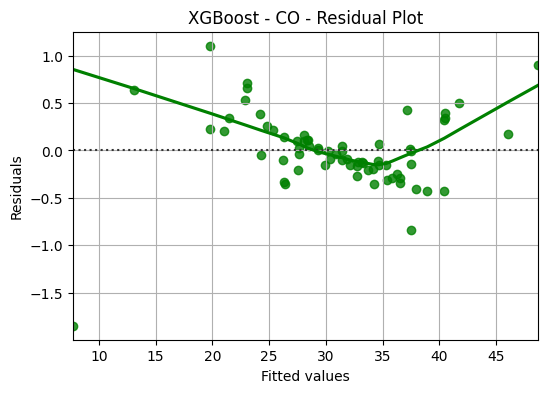

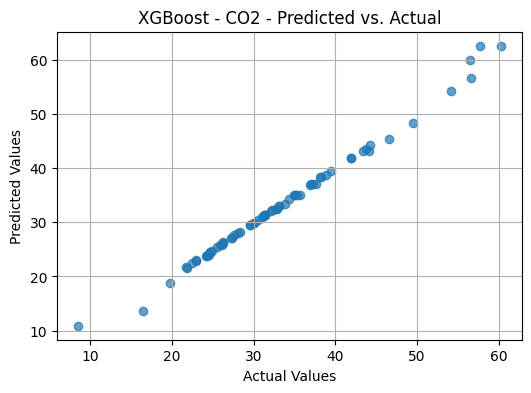

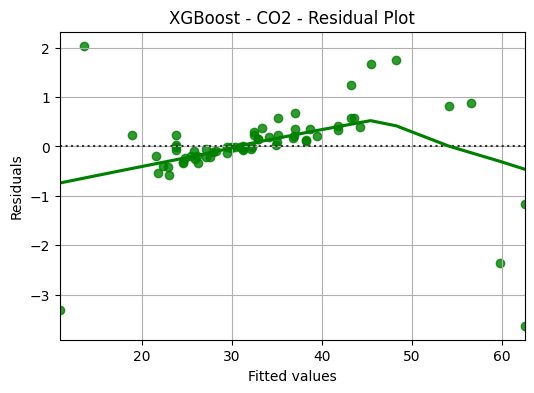

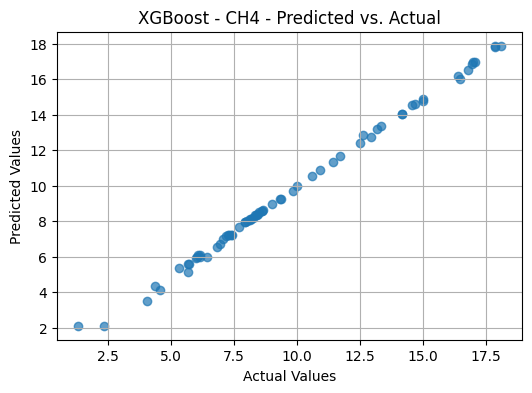

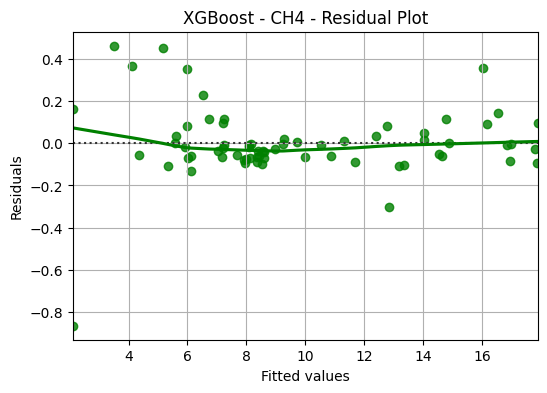

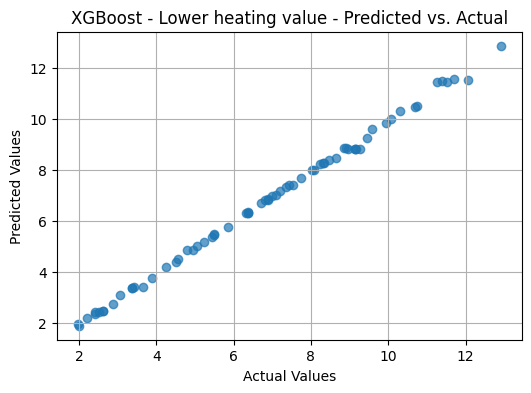

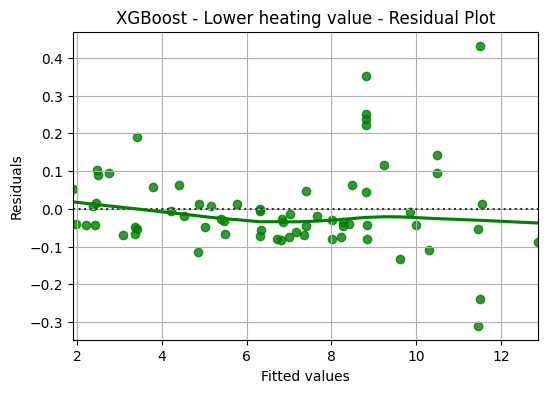

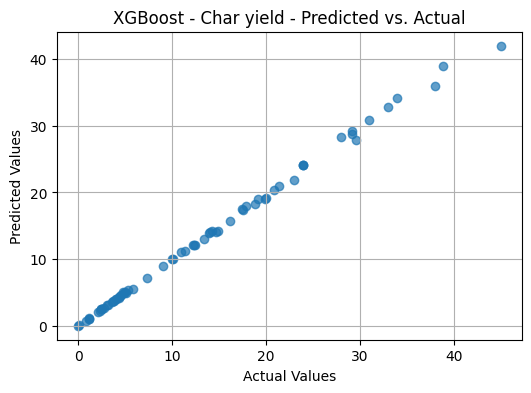

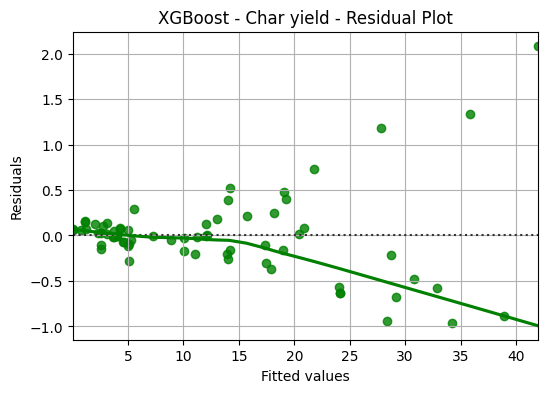

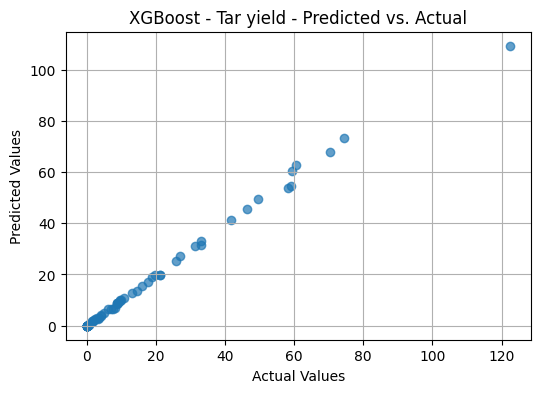

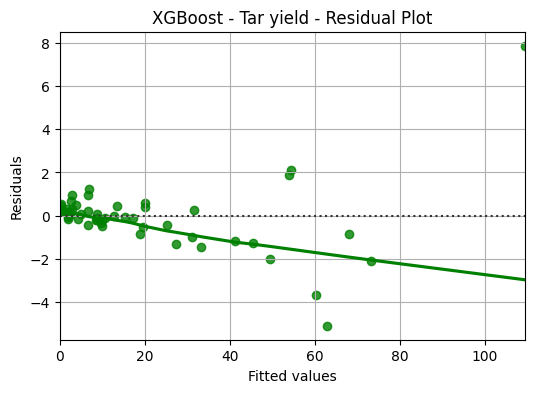

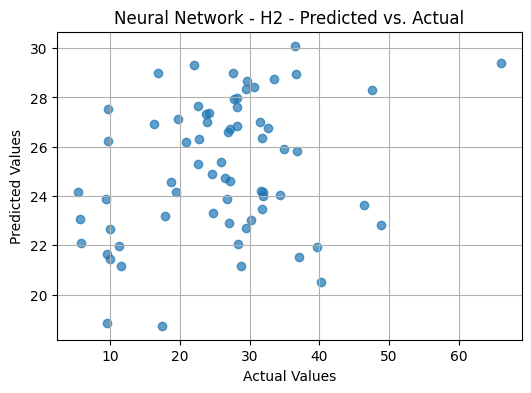

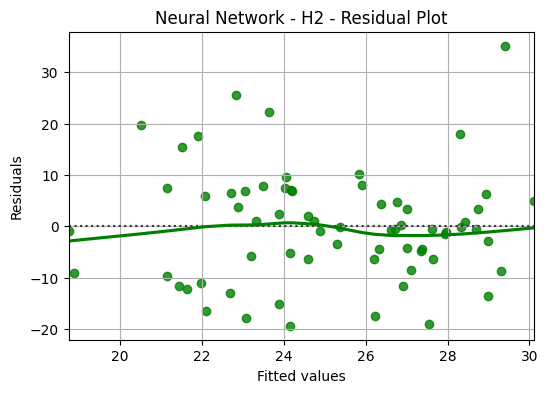

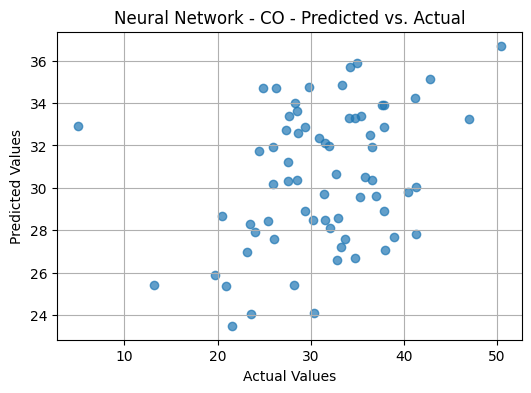

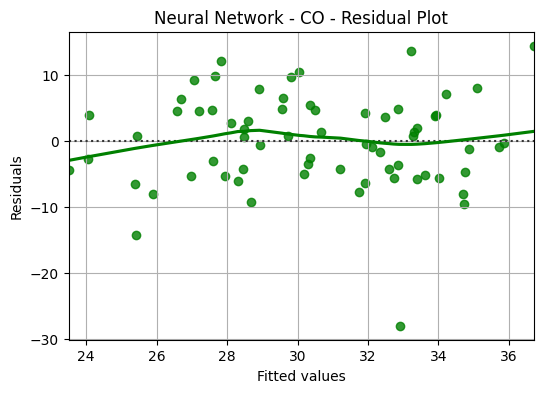

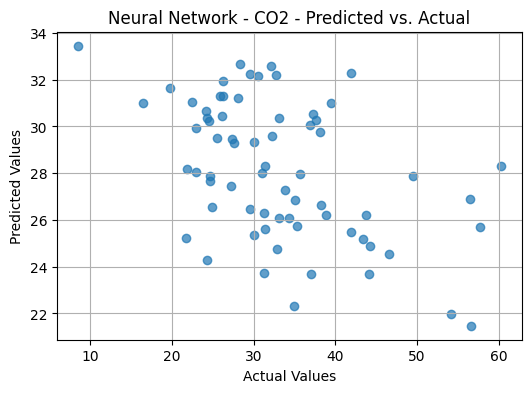

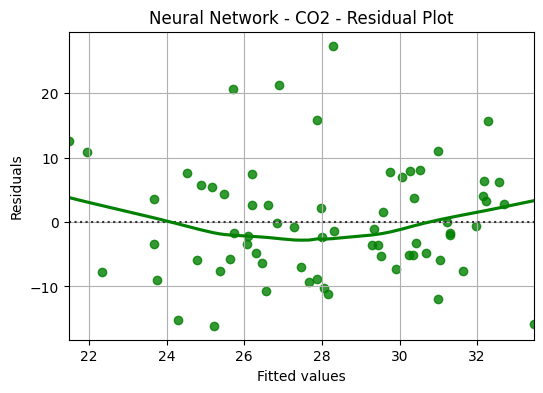

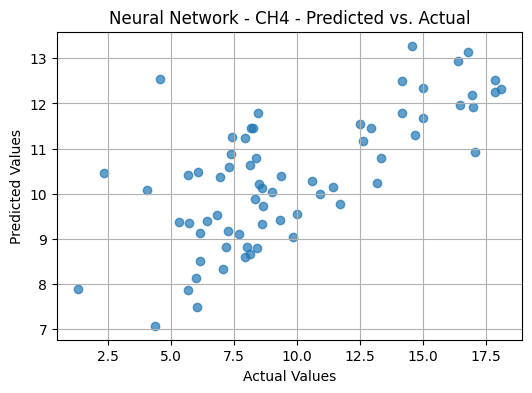

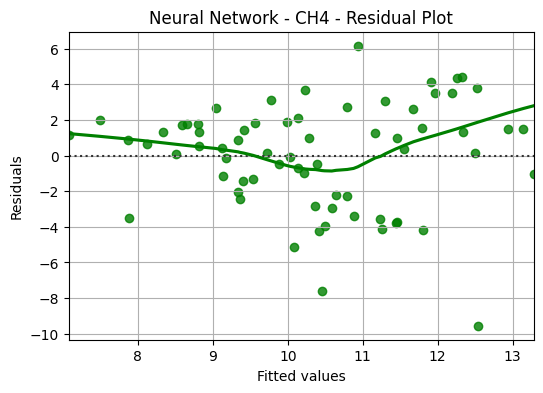

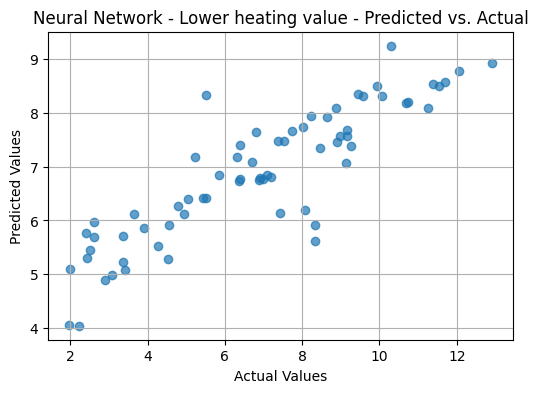

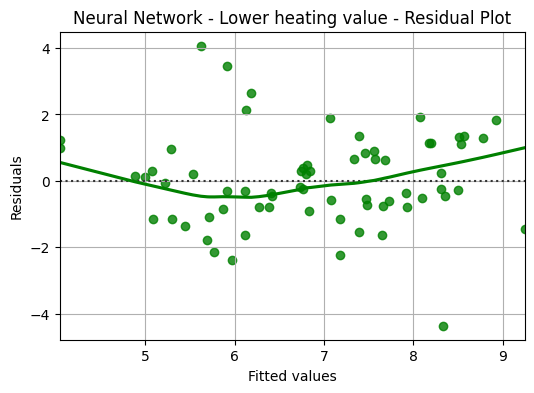

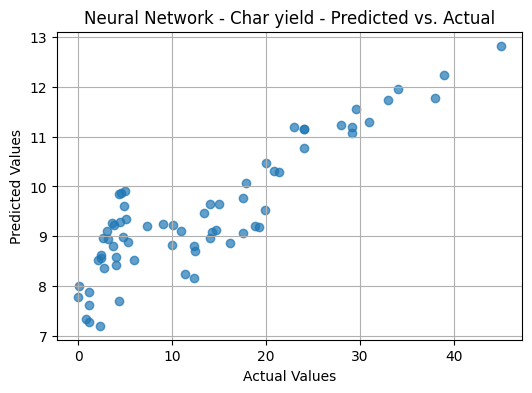

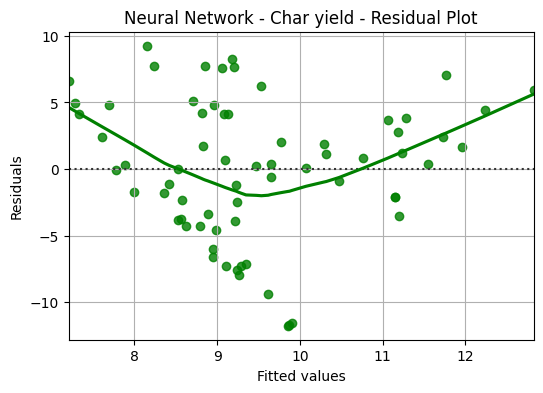

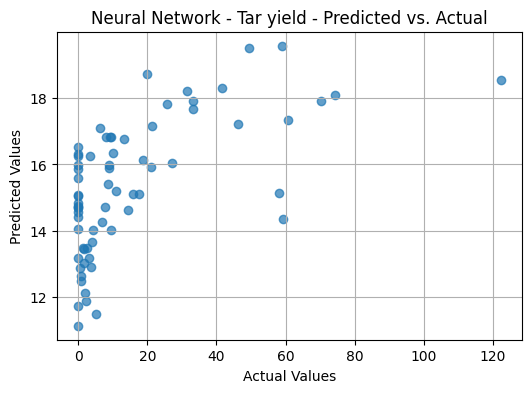

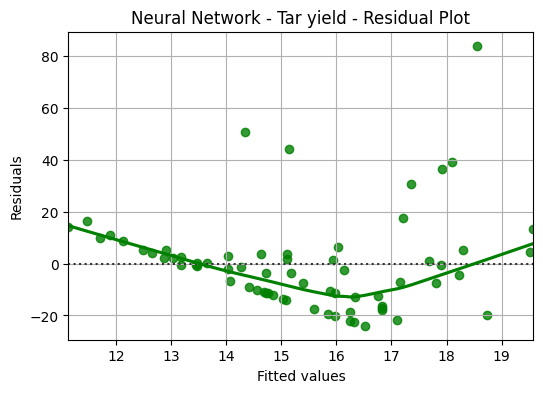

In [10]:
# Looping through models
for model_name, model in models.items():
    # Fitting the model and make predictions for each output variable
    for output_var in y_train.columns:
        y_train_single = y_train[output_var]
        y_val_single = y_validation[output_var]
        model.fit(y_train_scaled, y_train_single)
        y_pred = model.predict(y_val_scaled)

        # Plotting Predicted vs. Actual
        plt.figure(figsize=(6, 4))
        plt.scatter(y_val_single, y_pred, alpha=0.7)
        plt.title(f"{model_name} - {output_var} - Predicted vs. Actual")
        plt.xlabel("Actual Values")
        plt.ylabel("Predicted Values")
        plt.grid(True)
        plt.show()

        # Calculating residuals
        residuals = y_val_single - y_pred

        # Plotting Residuals
        plt.figure(figsize=(6, 4))
        sns.residplot(x=y_pred, y=residuals, lowess=True, color="g")
        plt.title(f"{model_name} - {output_var} - Residual Plot")
        plt.xlabel("Fitted values")
        plt.ylabel("Residuals")
        plt.grid(True)
        plt.show()



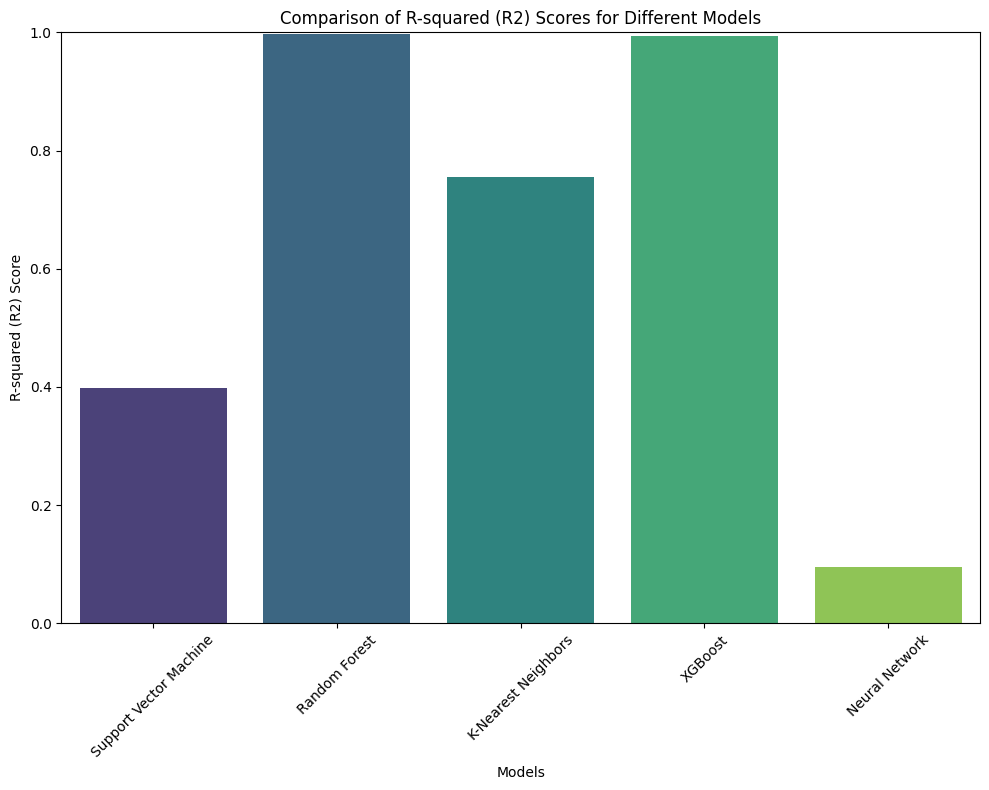

In [11]:
# Lists to store model names and R2 scores
model_names = []
r2_scores = []

# Looping through each model
for name, model in models.items():
    # Fitting the model on the scaled training data
    model.fit(y_train_scaled, y_train_single)

    # Predicting using the validation set
    y_pred = model.predict(y_val_scaled)

    # Calculating R-squared (R2) score
    r2 = r2_score(y_val_single, y_pred)

    # Append model name and R2 score to the lists
    model_names.append(name)
    r2_scores.append(r2)

# Creating a DataFrame for easy plotting
df = pd.DataFrame({'Model': model_names, 'R2 Score': r2_scores})

# Plotting using Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x='Model', y='R2 Score', data=df, palette='viridis')
plt.title('Comparison of R-squared (R2) Scores for Different Models')
plt.xlabel('Models')
plt.ylabel('R-squared (R2) Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

